# OMNIBUS Bill 2024 118TH CONGRESS 2D SESSION	H. RES. ll

# Data Mining Process Bravo

# Step1: initail cleaning and inspection.

# The following is the OMNI bus Bill exploration from the 1st processed dataset.

In [19]:
#-- Importing Nessesary libraries --#

import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.ensemble import RandomForestRegressor 
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import GradientBoostingRegressor
import warnings 
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import kruskal
import xgboost as xgb

In [20]:
#-- Importing the dataset --#
omni_raw = pd.read_csv('/Users/michaelsegaline/Desktop/OMNIBUS bill /cleaning process Bravo/OMNIBUS_bill2.1.csv')

In [21]:
omni_raw.head()

,Text,AgencyEarmark,Title,Highest_amount,Division
0,"\t1 \tDIVISION A—MILITARY CONSTRUCTION, \t2 \t...",NaN,A1\n\t,522220,A
1,"\t5 \t\tMILITARY CONSTRUCTION, NAVY AND MARINE...",NaN,A1\n\t,711505,A
2,"\t3 \t\t\tMILITARY CONSTRUCTION, AIR FORCE \n\...",NaN,A1\n\t,567874,A
3,"\t1 \t\t\tMILITARY CONSTRUCTION, DEFENSE-WIDE ...",NaN,A1\n\t,347545,A
4,"\t6 \tMILITARY CONSTRUCTION, ARMY NATIONAL GUA...",NaN,A1\n\t,620647,A


In [22]:
#-- Additional cleaning of the 'Title' column --#
omni = omni_raw.replace('\n\t', '', regex=True)

In [23]:
#-- Inspecting the shape --#
omni.shape

(827, 5)

In [24]:
#-- Getting Descriptive Statistics --#
omni.describe()

,AgencyEarmark,Highest_amount
count,0.0,827.000000
mean,NaN,168368.311971
std,NaN,227820.333101
min,NaN,100.000000
25%,NaN,13280.000000
50%,NaN,58292.000000
75%,NaN,238048.500000
max,NaN,998000.000000


In [25]:
#-- Inspecting Data types --#
omni.dtypes

Text               object
 AgencyEarmark    float64
Title              object
Highest_amount      int64
Division           object
dtype: object

In [26]:
#-- Now creating a new variable called 'Total_amount' --#
omni['Total_amount'] = omni['Highest_amount'].sum()

In [41]:
omni.head()

,Text,Highest_amount,Total_amount,Title_A1,Title_A2,Title_A3,Title_B1,Title_B3,Title_B4,Title_B5,...,Title_E3,Title_F1,Title_F2,Title_F3,Division_ E,Division_A,Division_B,Division_C,Division_D,Division_F
0,"\t1 \tDIVISION A—MILITARY CONSTRUCTION, \t2 \t...",522220,139240594,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,"\t5 \t\tMILITARY CONSTRUCTION, NAVY AND MARINE...",711505,139240594,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,"\t3 \t\t\tMILITARY CONSTRUCTION, AIR FORCE 4 \...",567874,139240594,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,"\t1 \t\t\tMILITARY CONSTRUCTION, DEFENSE-WIDE ...",347545,139240594,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,"\t6 \tMILITARY CONSTRUCTION, ARMY NATIONAL GUA...",620647,139240594,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
#-- Loop through each column and calculate percentage of missing rows --#
#-- AgencyEarmark will be dropped due to the percentage of missing rows --#
for column in omni.columns:
    missing_count = omni[column].isnull().sum()
    missing_percentage = missing_count / len(omni) * 100
    print(f"Column '{column}' has {missing_count} missing rows ({missing_percentage:.2f}%)")

Column 'Text' has 0 missing rows (0.00%)
Column ' AgencyEarmark' has 827 missing rows (100.00%)
Column 'Title' has 36 missing rows (4.35%)
Column 'Highest_amount' has 0 missing rows (0.00%)
Column 'Division' has 0 missing rows (0.00%)
Column 'Total_amount' has 0 missing rows (0.00%)


In [29]:
omni.head()

,Text,AgencyEarmark,Title,Highest_amount,Division,Total_amount
0,"\t1 \tDIVISION A—MILITARY CONSTRUCTION, \t2 \t...",NaN,A1,522220,A,139240594
1,"\t5 \t\tMILITARY CONSTRUCTION, NAVY AND MARINE...",NaN,A1,711505,A,139240594
2,"\t3 \t\t\tMILITARY CONSTRUCTION, AIR FORCE 4 \...",NaN,A1,567874,A,139240594
3,"\t1 \t\t\tMILITARY CONSTRUCTION, DEFENSE-WIDE ...",NaN,A1,347545,A,139240594
4,"\t6 \tMILITARY CONSTRUCTION, ARMY NATIONAL GUA...",NaN,A1,620647,A,139240594


In [30]:
#-- Now converting 'Title' and 'Division' w/ get_dummies() --#
omni = pd.get_dummies(omni, columns=['Title', 'Division'])

In [31]:
omni.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AgencyEarmark,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Highest_amount,827.0,1.683683e+05,227820.333101,100.0,13280.0,58292.0,238048.5,998000.0
Total_amount,827.0,1.392406e+08,0.000000,139240594.0,139240594.0,139240594.0,139240594.0,139240594.0
Title_A1,827.0,4.353083e-02,0.204172,0.0,0.0,0.0,0.0,1.0
Title_A2,827.0,4.715840e-02,0.212106,0.0,0.0,0.0,0.0,1.0
Title_A3,827.0,7.255139e-03,0.084919,0.0,0.0,0.0,0.0,1.0
Title_B1,827.0,6.529625e-02,0.247197,0.0,0.0,0.0,0.0,1.0
Title_B3,827.0,5.199516e-02,0.222152,0.0,0.0,0.0,0.0,1.0
Title_B4,827.0,9.673519e-03,0.097936,0.0,0.0,0.0,0.0,1.0
Title_B5,827.0,8.464329e-03,0.091667,0.0,0.0,0.0,0.0,1.0


In [44]:
#-- Inspecting variable types --#
omni = omni.dropna()

In [46]:
omni.shape

(827, 31)

In [48]:
#-- Saving the dataset to csv --#
omni.to_csv('/Users/michaelsegaline/Desktop/OMNIBUS_bill2_binary.csv', index=False)

# Exploring Agency / Ear Marks 

Below is an search of the Top 20 sections of the bill that get the highest amounts of money.

In [33]:
#-- Which Earmarks get the most money --#

top_20_agencies_or_Earmarks = omni.nlargest(20, 'Highest_amount')[['Highest_amount','Text']]
top_20_agencies_or_Earmarks

,Highest_amount,Text
183,998000,"\t1 \tAct of 2008: Provided further, That of t..."
598,996755,"\t1 \tthe Indian Healthcare Improvement Fund, ..."
69,990446,17 \t\tSEC. 251. Of the amounts made available...
704,977955,10 \t\tSEC. 165. Of the unobligated balances m...
515,976000,17 \t\tINDIAN LAND AND WATER CLAIM SETTLEMENTS...
57,961218,"\t7 \t\t\t\tCONSTRUCTION, MAJOR PROJECTS 8 \t\..."
645,948211,\t1 \toperation (including leasing) and mainte...
49,943000,\t1 \tpitals and homes under the jurisdiction ...
338,935000,1 \tchase and hire of passenger motor vehicles...
186,932000,\t1 \t\t\t\t\t\t\tTITLE V 2 \t\t\t\tFOREIGN AS...


In [34]:
#-- Dropping 'AggencyEarmark' due to the high percentage of missing variables --#
omni.drop(columns=[' AgencyEarmark'], inplace=True)


In [35]:
#-- Passing the entire Dataframe into a correlation Matrix --#
correlation_matrix = omni.corr()


<AxesSubplot:>

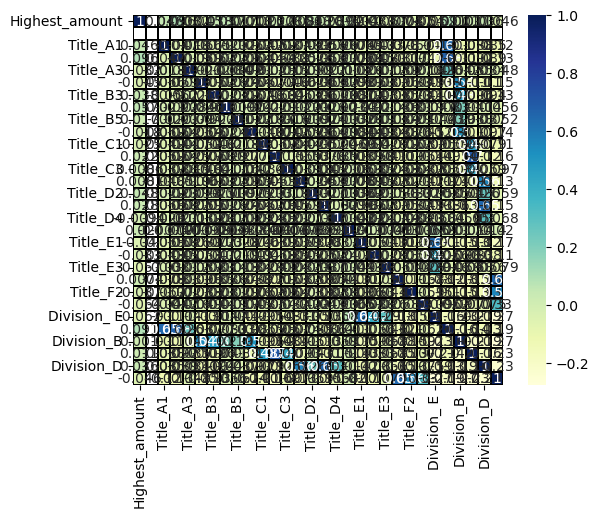

In [36]:
# Draw the heatmap using seaborn
sns.heatmap(correlation_matrix, linewidths=0.25, vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

The above correlation matrix is messy with all the varaibles. However its nessesary and showcases the 'tiered' like structucres of the Titles correlating to the divisions,conducted in the Data Mining Step Alpha.

# Now seperating the dataset into two cleaner sets for exploration: 
titles(representing titles of the Bill)
DIV(representing the divisions of the Bill)

In [37]:
titles = omni[['Highest_amount', 'Title_A1','Title_A2', 'Title_A3', 'Title_B1', 'Title_B3', 'Title_B4', 'Title_B5','Title_B6', 'Title_C1', 'Title_C2', 'Title_C3', 'Title_D1', 'Title_D2','Title_D3', 'Title_D4', 'Title_E', 'Title_E1', 'Title_E2 ', 'Title_E3','Title_F1', 'Title_F2', 'Title_F3']]
DIV = omni[['Division_A', 'Division_B', 'Division_C', 'Division_D', 'Division_F', 'Division_ E','Highest_amount']]

# Sentiment Analysis: per the representation of the earmark per overall bill.

The below Correlation matrix indicatites the Division and title per dollar amount. Notice that 'Title_A2'has the highest correlation with the highest amount, at 9% of the budget. 

However, its no secret that 20% of the U.S. Budget goes to Defense, which occupys the Division_A of the Bill.

# Exploring each Title per division and how correlted it is to the 'Highest_amount' variable. 

Give a hasty sentiment as per the representation of the earmark per overall bill. 


                Highest_amount  Title_A1  Title_A2  Title_A3  Title_B1  \
Highest_amount        1.000000  0.046406  0.096175 -0.032159 -0.044604   
Title_A1              0.046406  1.000000 -0.047460 -0.018238 -0.056386   
Title_A2              0.096175 -0.047460  1.000000 -0.019018 -0.058800   
Title_A3             -0.032159 -0.018238 -0.019018  1.000000 -0.022595   
Title_B1             -0.044604 -0.056386 -0.058800 -0.022595  1.000000   
Title_B3              0.037576 -0.049962 -0.052101 -0.020021 -0.061899   
Title_B4              0.057258 -0.021085 -0.021987 -0.008449 -0.026122   
Title_B5              0.016992 -0.019711 -0.020555 -0.007899 -0.024420   
Title_B6             -0.017842 -0.051775 -0.053991 -0.020747 -0.064145   
Title_C1             -0.025026 -0.042101 -0.043903 -0.016871 -0.052159   
Title_C2              0.022310 -0.061786 -0.064431 -0.024759 -0.076548   
Title_C3              0.008599 -0.036882 -0.038461 -0.014779 -0.045694   
Title_D1              0.008123 -0.0480

<AxesSubplot:>

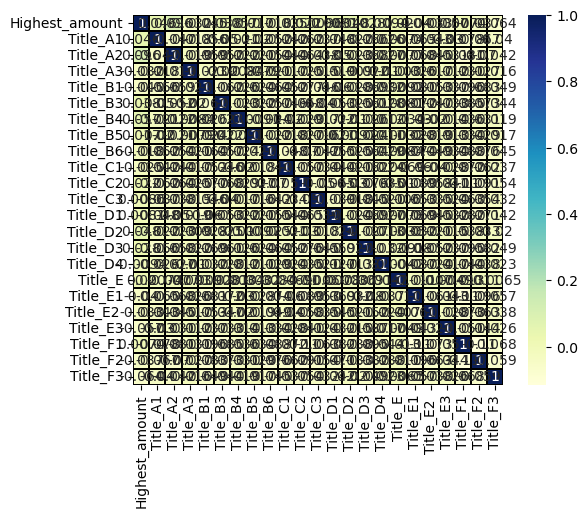

In [38]:
#-- Creating a correlation matrix to analyis colinearity amoungst the target and predictor variables --#
title_matrix = titles.corr()
print(title_matrix)
# Draw the heatmap using seaborn
sns.heatmap(title_matrix, linewidths=0.25, vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

<AxesSubplot:>

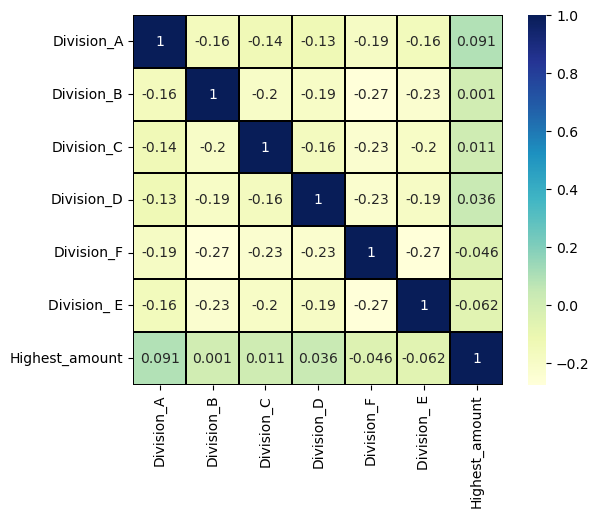

In [67]:
#-- Creating a correlation matrix to analyis colinearity amoungst the target and predictor variables --#
DIV_matrix = DIV.corr()

# Draw the heatmap using seaborn
sns.heatmap(DIV_matrix, linewidths=0.25, vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

It appears that Division A gets the most funding. Notice how all the divisions of the bill are negatively correlated with each other. Notice that Divisions:A-D are postivily corelated with 'Highest_amount' and Divsions:E and F are negatively corelated. 

[]

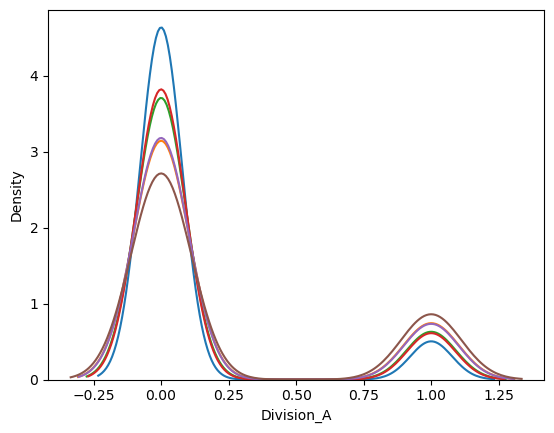

In [39]:
sns.kdeplot(omni['Division_A']).plot()
sns.kdeplot(omni['Division_B']).plot()

sns.kdeplot(omni['Division_C']).plot()
sns.kdeplot(omni['Division_D']).plot()
sns.kdeplot(omni['Division_ E']).plot()
sns.kdeplot(omni['Division_F']).plot()

The below output of 'Highest_amount', will be considered the target variable. Notice how the distrobution appears to be random. 

<AxesSubplot:>

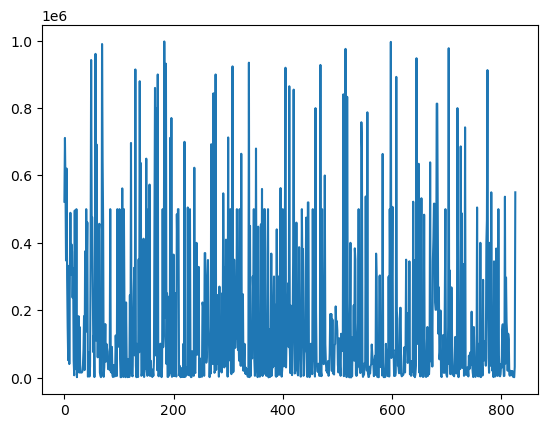

In [40]:
omni["Highest_amount"].plot()

# Bivariate exploration 

In order to explore the variable distrobution from another view, seaborn jointplot will be used. 

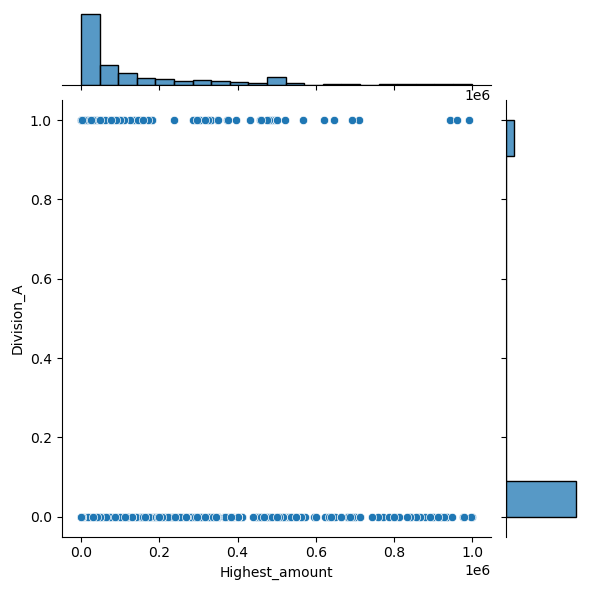

In [87]:
sns.jointplot(data=DIV, y='Division_A', x='Highest_amount', kind='scatter')
plt.show()

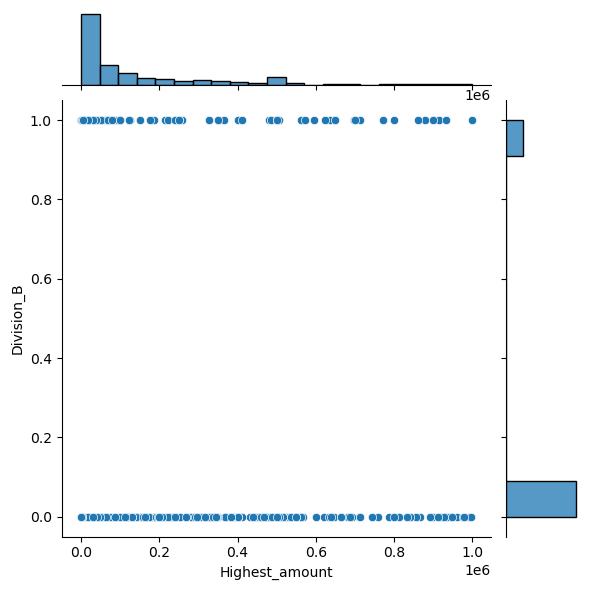

In [88]:
sns.jointplot(data=DIV, y='Division_B', x='Highest_amount', kind='scatter')
plt.show()

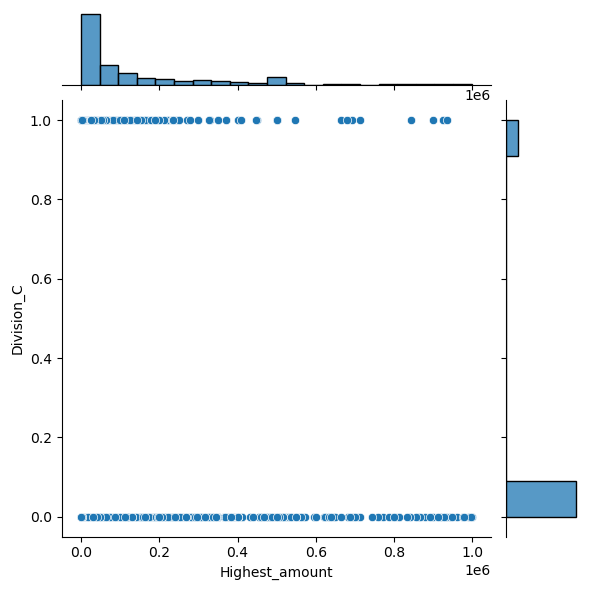

In [89]:
sns.jointplot(data=DIV, y='Division_C', x='Highest_amount', kind='scatter')
plt.show()

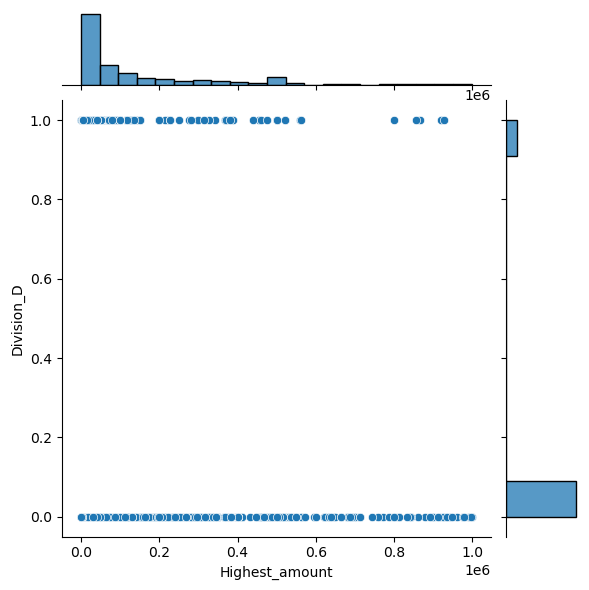

In [90]:
sns.jointplot(data=DIV, y='Division_D', x='Highest_amount', kind='scatter')
plt.show()

Since the above visualizations indicate that each division is of the same distrobution, 'left-skewed'; Therefore,the Kruskal Wallis test will be used to determine group similarity of non-parametric data. 

# Running a Kruskal-Wallis test to compare the differences between groups.

In [94]:
group1 = DIV.Division_A
group2 = DIV.Division_B
group3 = DIV.Division_C
group4 = DIV.Division_D
group5 = DIV['Division_ E']
group6 = DIV.Division_F

In [99]:
#-- Now comparing 'views', 'likes', 'dislikes', and 'comment_count' --#

#-- Perform Kruskal-Wallis test --#
statistic, p_value = kruskal(*group1, group2, group3, group4,group5,group6)



KruskalResult(statistic=74.49961414123335, pvalue=1.1831297720508777e-14)

In [100]:
#-- Interpret the results --#
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is significant evidence that the medians of the groups are different.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude that the medians of the groups are different.")

Fail to reject the null hypothesis: There is not enough evidence to conclude that the medians of the groups are different.


# According to the above Machine Learning model, Kruskal Wallis, there appears to be no difference between the distrobutions of the Divisions.

# Step 5 Exploratory Analysis via Unsupervised Machine Learning
The first Machine Learning model used is Principal Component Analysis (PCA). PCA helps determine the necessary number of variables for the model contingent upon the amount of variance contained in the variables. PCA is a dimensionality reduction technique that reduces variables to Principal Components. Reducing the variables to eigen vectors then eigen values.

Next, the Principal Components are explored via KMeans Cluster Analysis, another unsupervised machine learning technique.

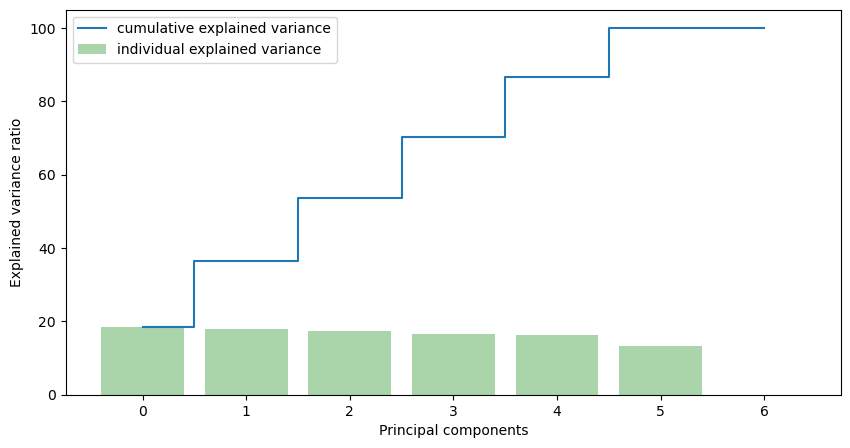

In [137]:
#-- Scaling the data --#
#-- Create the object --#
scaler = StandardScaler()
df_scaled = scaler.fit_transform(DIV)
 #-- Calculate the mean and Standard deviation --#
#-- Conducting PCA --#
#-- Calculating Eigenvectors and eigenvalues of Cov matrix --#
mean_vec = np.mean(df_scaled, axis=0)
cov_mat = np.cov(df_scaled.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#-- Create a list of (eigenvalue, eigenvector) tuples --#
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
#-- Sort from high to low --#
eig_pairs.sort(key = lambda x: x[0], reverse= True)
 
#-- Calculation of Explained Variance from the eigenvalues --#
tot = sum(eig_vals)
#-- Individual explained variance --#
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] 
#-- Cumulative explained variance --#
cum_var_exp = np.cumsum(var_exp)
 
#-- Plot out the variances superimposed --#
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'K-means with PCA clustering ')

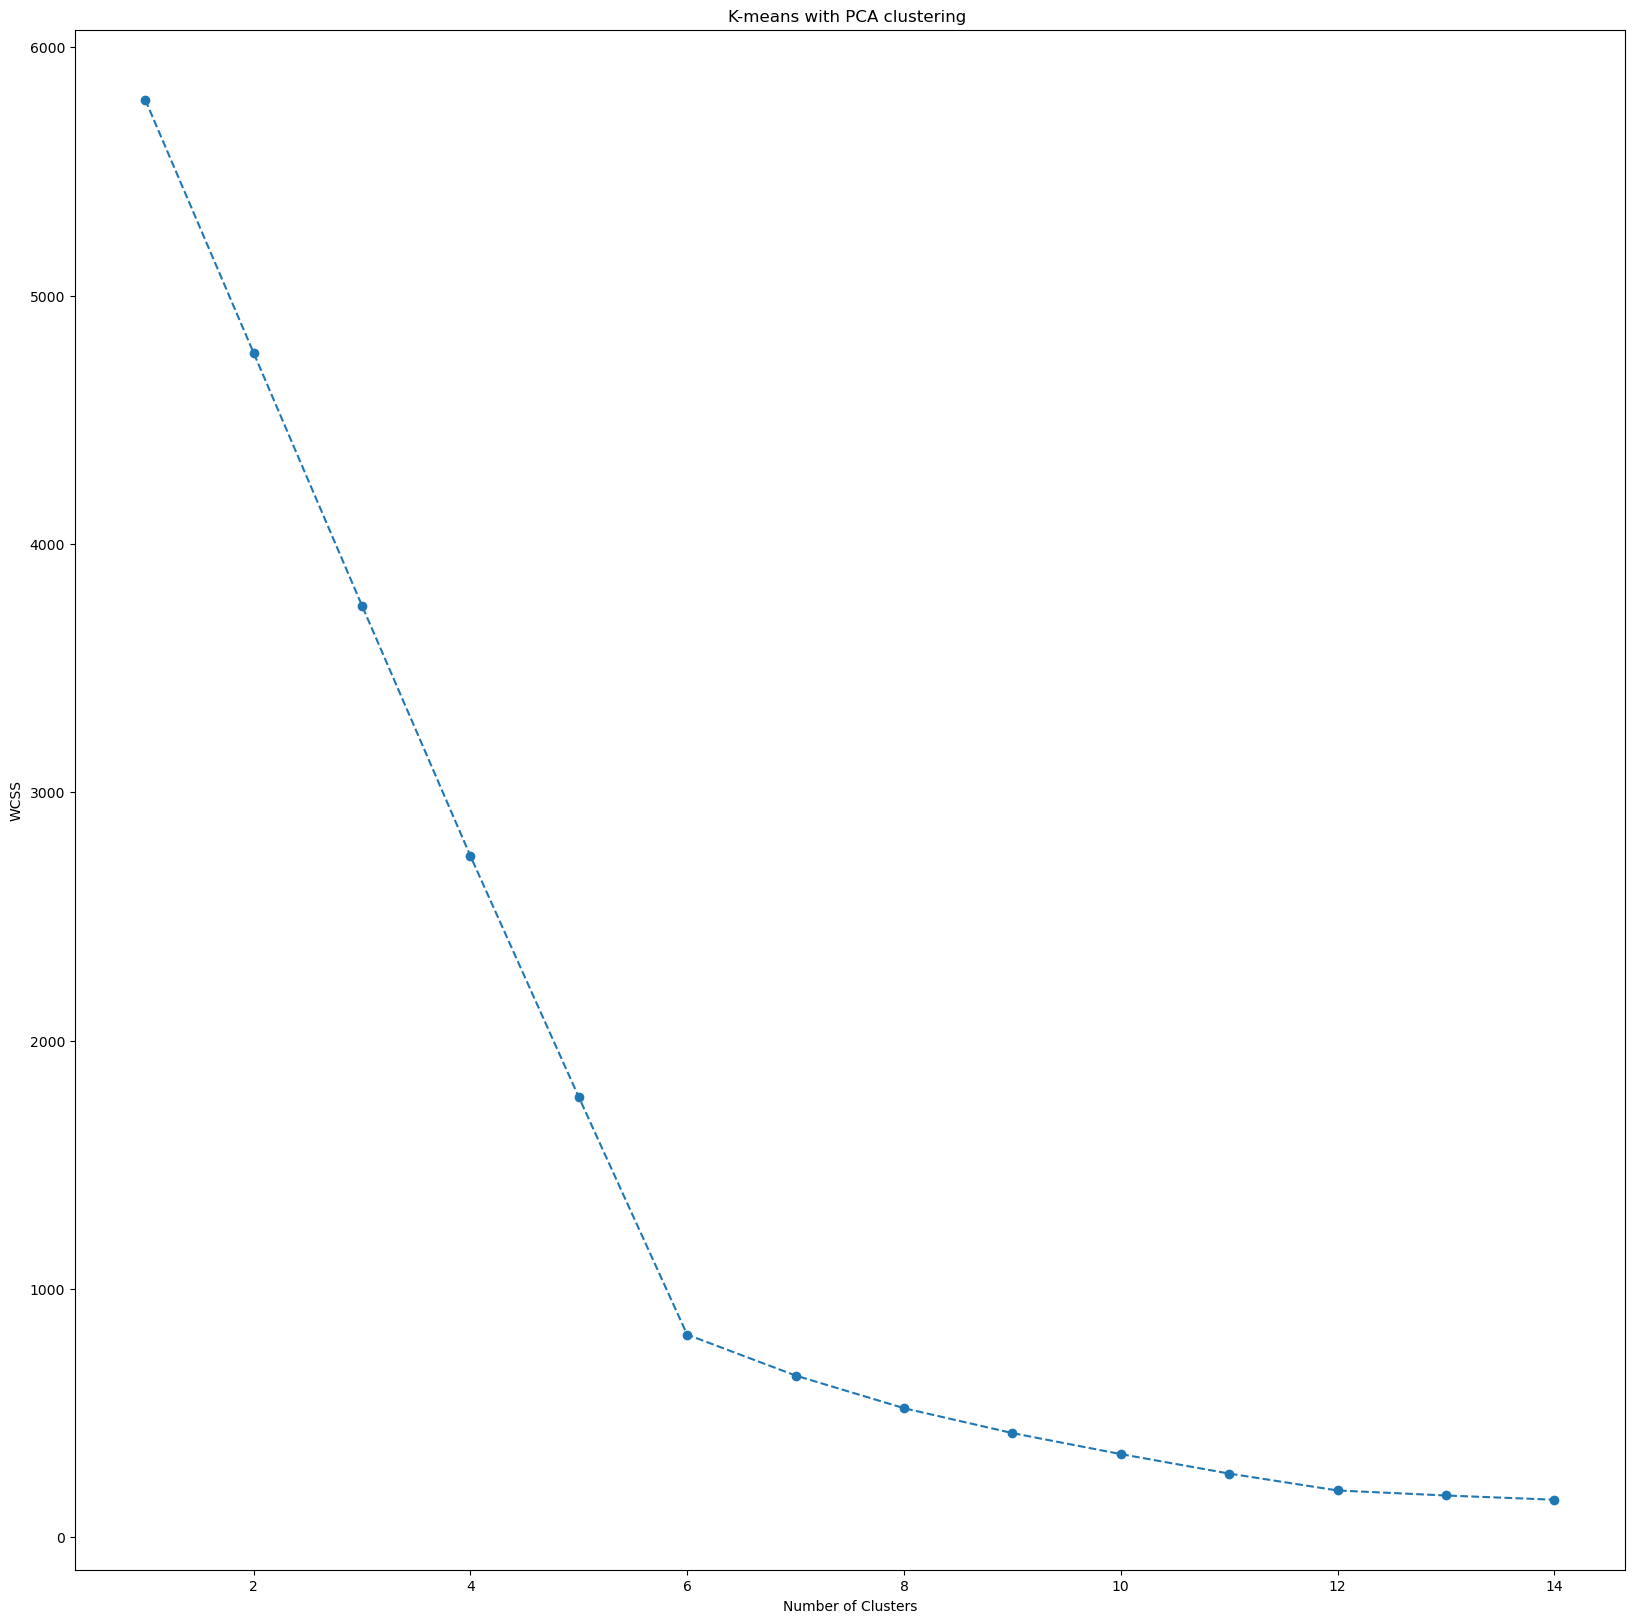

In [138]:
#-- Determining the number of clusters with the Elbow Method --#
#-- Kmeans clustering with PCA --#
wcss = [] #-- sum of squares of distances of datapoints --#
for i in range(1,15):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans_pca.fit(df_scaled)
    wcss.append(kmeans_pca.inertia_)
 
#-- Now plotting the Elbow Graph --#
plt.figure(figsize = (20,20))
plt.plot(range(1,15), wcss, marker ='o', linestyle ='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA clustering ')

 According to the above Scree plot, the Kaiser Criterion, and 'elbow method', the optimal number of variables / clusters is at 6.

Indicating that all the Principal Components are eaqual in Variance. 

# Step 5.5: KMean Cluster Analysis, exploring the 'Divisions' dataset reduced dimensional space.

# See what the machines see with KMeans.

Imagine you are in a spaceship,(in literal vector space) and you are approaching a galaxy from a distance and you ask your ship's auto-navigator to show you the entire galaxy as one grouping. The auto-navigator will move the spaceship to reorient in space, displaying to you the entire galaxy as one group. For each cluster number, the spaceship reorients in space / time, most effectively displaying to you the different star color groups in space-time.

Exploring Principal components in this space can reveal patterns that can be better understood or exploited by other machine learning models.

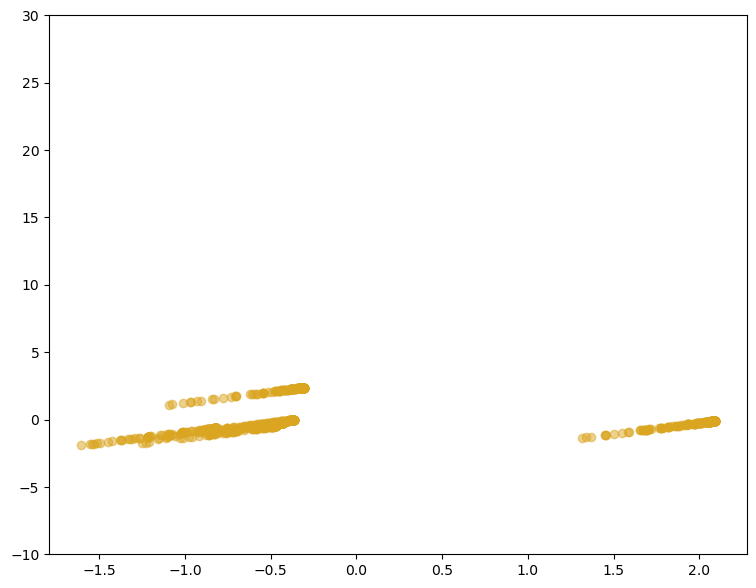

In [139]:
#-- Exploring how the data clusters when transformed with PCA and ‘k’ =1 --#

pca = PCA(n_components=4)

pca_kmeans = pca.fit_transform(df_scaled)

plt.figure(figsize = (9,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,1], c='goldenrod',alpha=0.5)

plt.ylim(-10,30)

plt.show()

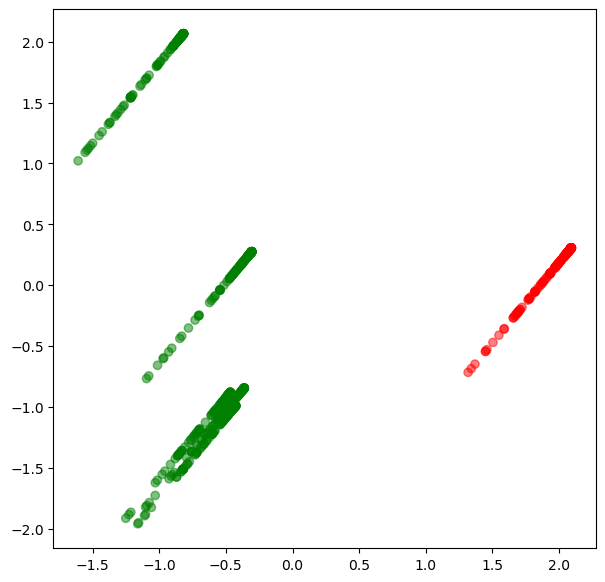

In [140]:
#-- Now running KMeans with 2 clusters --#

kmeans_pca = KMeans(n_clusters =2, init = 'k-means++', random_state = 42)

#-- Kmeans with two clusters --#

#-- Compute cluster centers by fitting the data to the model and predict cluster indices --#

X_clustered = kmeans_pca.fit_predict(pca_kmeans)

#-- Define our own color map--#

LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter digram --#

plt.figure(figsize = (7,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,2], c= label_color, alpha=0.5) 

plt.show()

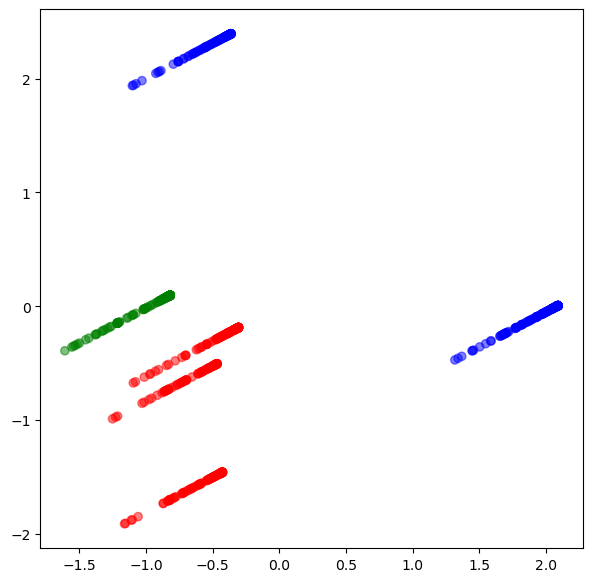

In [141]:
#-- Now setting  'k' = 3 clusters --#

kmeans = KMeans(n_clusters=3)

# Compute cluster centers and predict cluster indices

X_clustered = kmeans.fit_predict(pca_kmeans) 

#-- Define the color map --#

LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b',3:'y'}

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter digram --#

plt.figure(figsize = (7,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,3], c= label_color, alpha=0.5) 

plt.show()

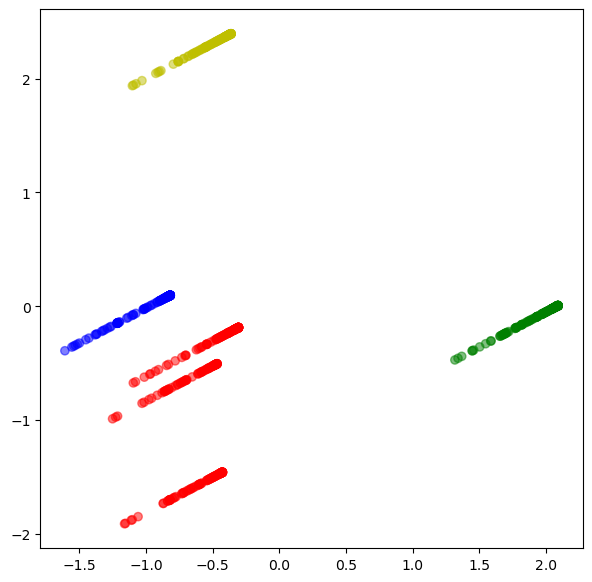

In [142]:
#-- Now setting  'k' = 4 clusters --#

kmeans = KMeans(n_clusters=4)

# Compute cluster centers and predict cluster indices

X_clustered = kmeans.fit_predict(pca_kmeans) 

#-- Define the color map --#

LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b',3:'y'}

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter digram --#

plt.figure(figsize = (7,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,3], c= label_color, alpha=0.5) 

plt.show()

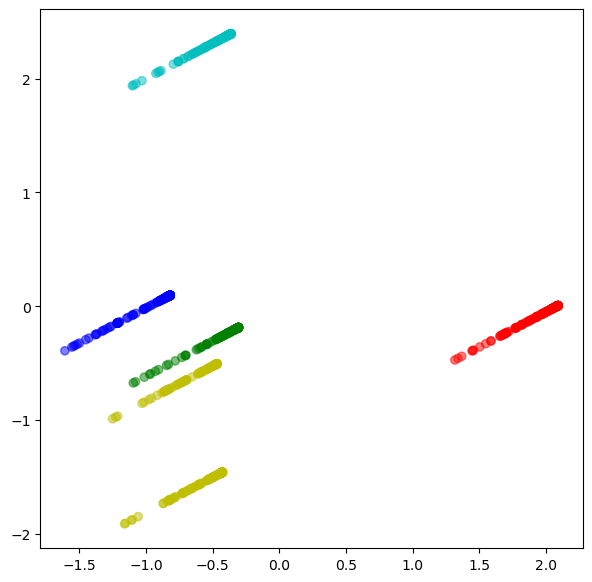

In [143]:
#-- Now setting  'k' = 5 clusters --#

kmeans = KMeans(n_clusters=5)

# Compute cluster centers and predict cluster indices

X_clustered = kmeans.fit_predict(pca_kmeans) 

#-- Define the color map --#

LABEL_COLOR_MAP = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'c', 5: 'm', 6: 'k'} 

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter digram --#

plt.figure(figsize = (7,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,3], c= label_color, alpha=0.5) 

plt.show()

The above graphs indicate difined structure and imply a highly predictive properties. However, adding more clusters does not appear to divide or change the position in vector space. 

# Now exploring the Titles per Division 

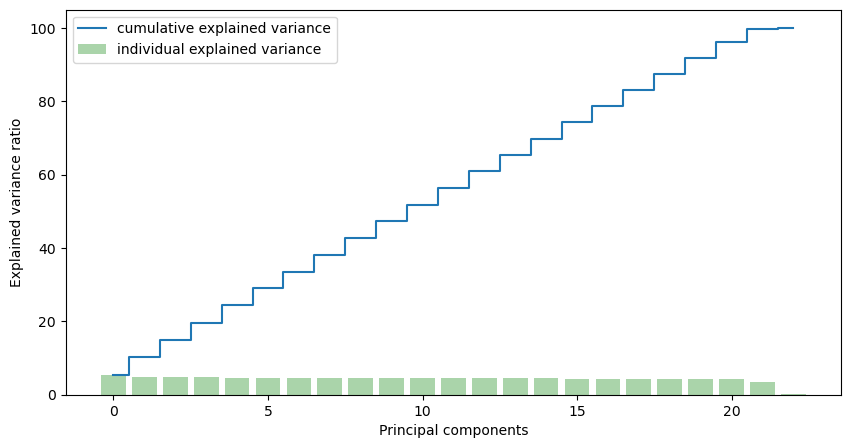

In [135]:
#-- Scaling the data --#
#-- Create the object --#
scaler = StandardScaler()
df_scaled2 = scaler.fit_transform(titles)
 #-- Calculate the mean and Standard deviation --#
#-- Conducting PCA --#
#-- Calculating Eigenvectors and eigenvalues of Cov matrix --#
mean_vec = np.mean(df_scaled2, axis=0)
cov_mat = np.cov(df_scaled2.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#-- Create a list of (eigenvalue, eigenvector) tuples --#
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
#-- Sort from high to low --#
eig_pairs.sort(key = lambda x: x[0], reverse= True)
 
#-- Calculation of Explained Variance from the eigenvalues --#
tot = sum(eig_vals)
#-- Individual explained variance --#
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] 
#-- Cumulative explained variance --#
cum_var_exp = np.cumsum(var_exp)
 
#-- Plot out the variances superimposed --#
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'K-means with PCA clustering ')

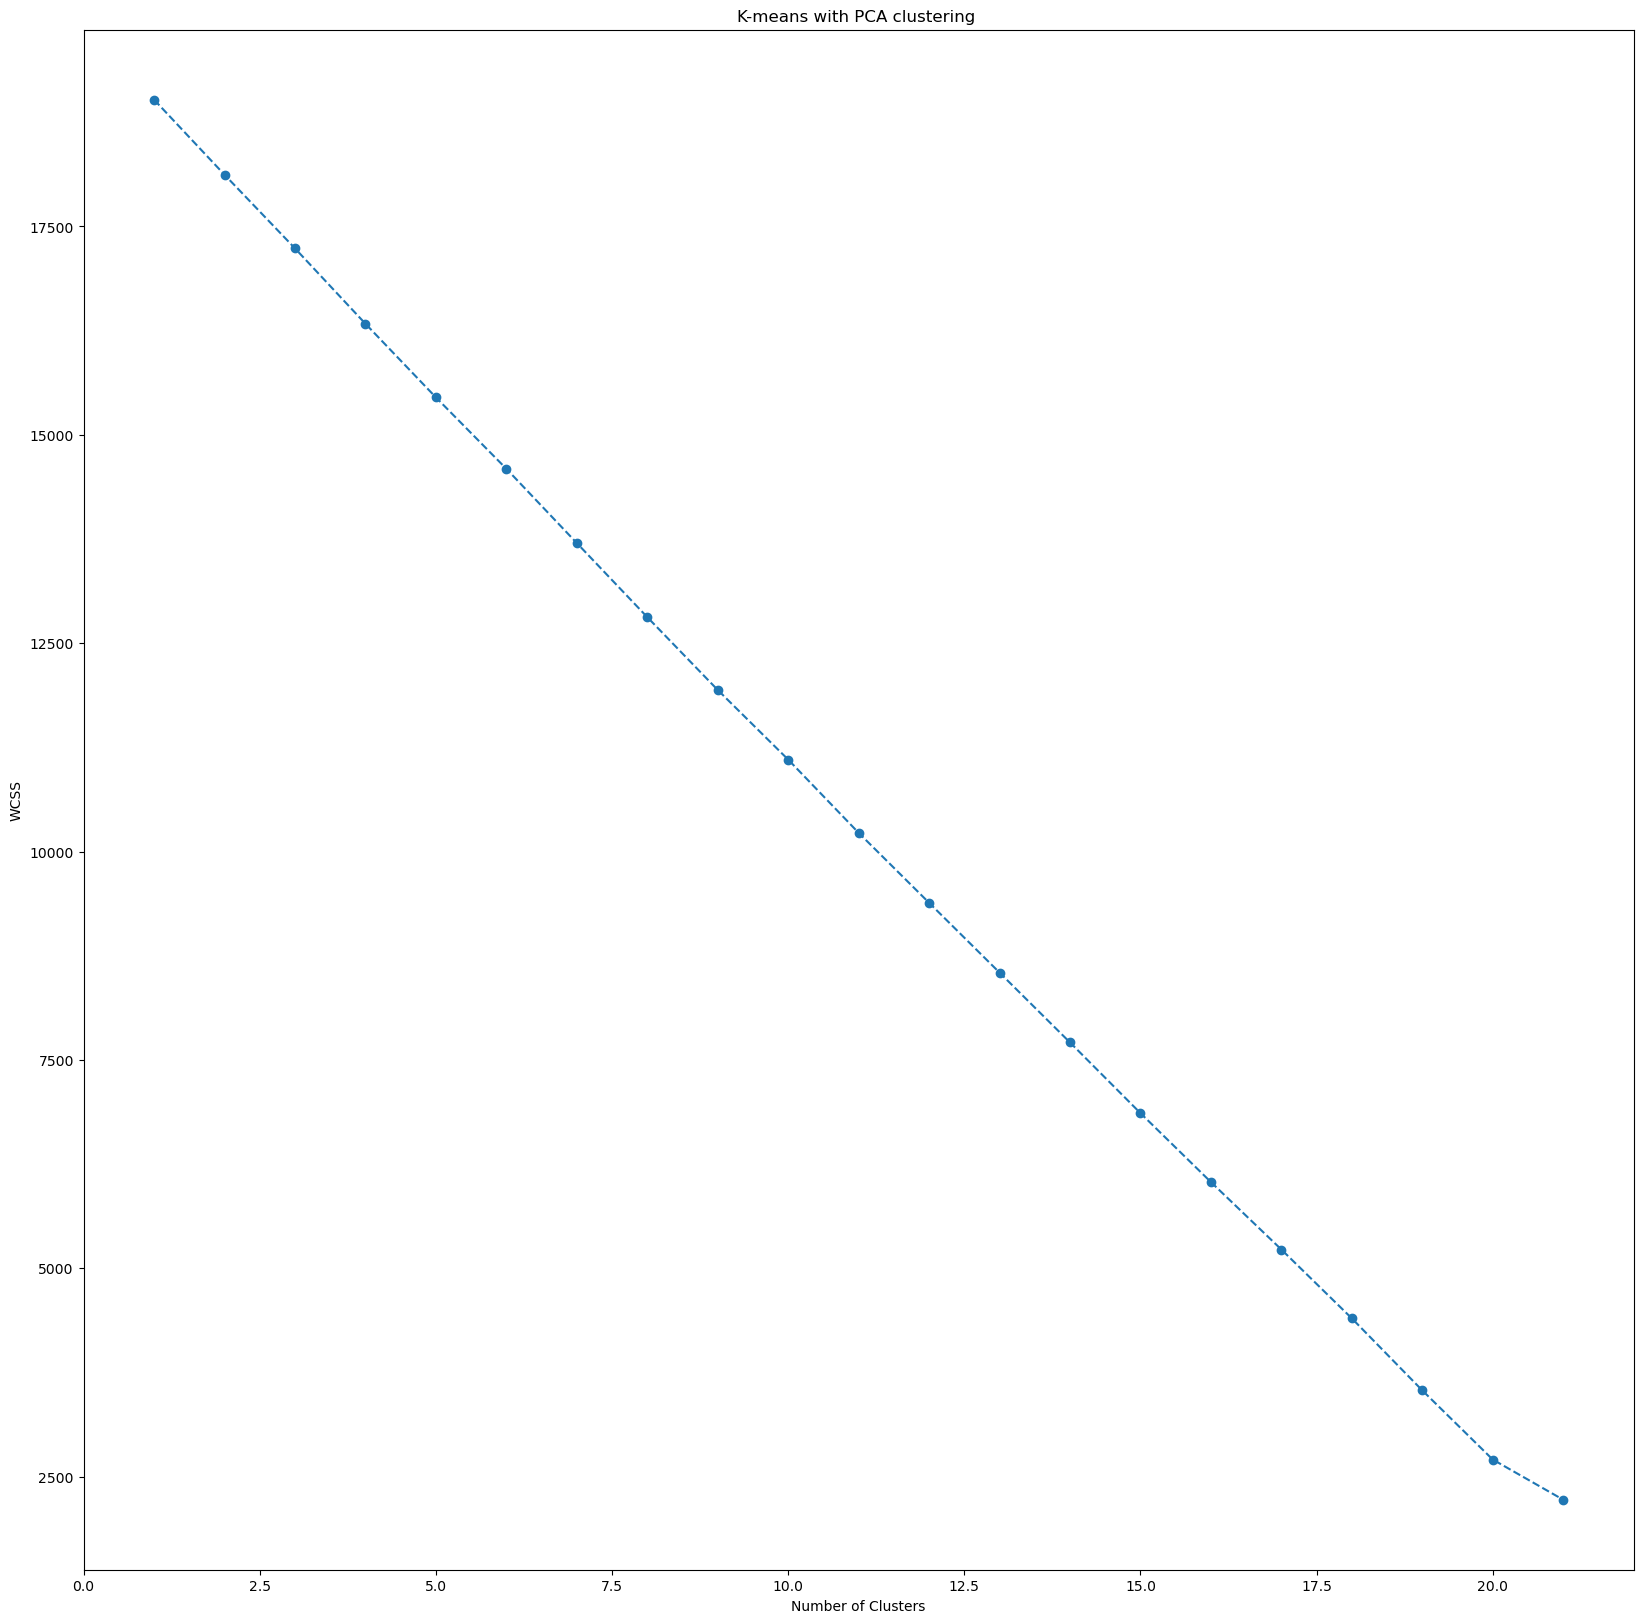

In [136]:
#-- Determining the number of clusters with the Elbow Method --#
#-- Kmeans clustering with PCA --#
wcss = [] #-- sum of squares of distances of datapoints --#
for i in range(1,22):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans_pca.fit(df_scaled)
    wcss.append(kmeans_pca.inertia_)
 
#-- Now plotting the Elbow Graph --#
plt.figure(figsize = (20,20))
plt.plot(range(1,22), wcss, marker ='o', linestyle ='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA clustering ')

 The title variances are representative of the associatied divisions and showcase equal variance amoung the variables. 

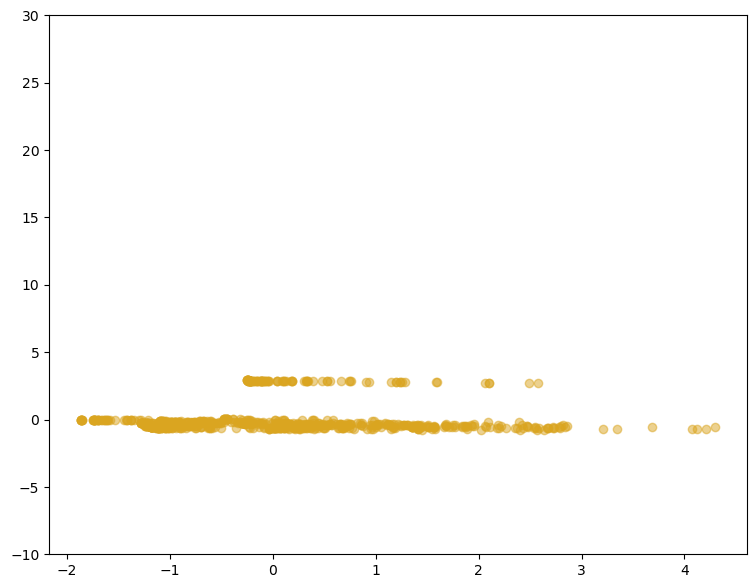

In [126]:
#-- Exploring how the data clusters when transformed with PCA and ‘k’ =1 --#

pca = PCA(n_components=22)

pca_kmeans = pca.fit_transform(df_scaled)

plt.figure(figsize = (9,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,1], c='goldenrod',alpha=0.5)

plt.ylim(-10,30)

plt.show()

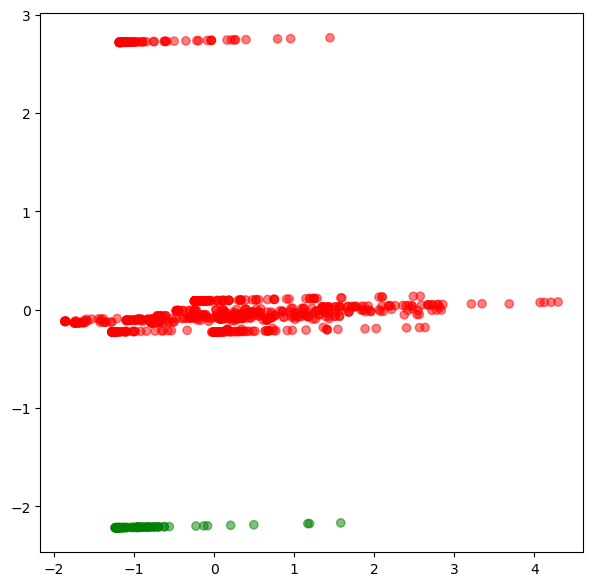

In [127]:
#-- Now running KMeans with 2 clusters --#

kmeans_pca = KMeans(n_clusters =2, init = 'k-means++', random_state = 42)

#-- Kmeans with two clusters --#

#-- Compute cluster centers by fitting the data to the model and predict cluster indices --#

X_clustered = kmeans_pca.fit_predict(pca_kmeans)

#-- Define our own color map--#

LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter digram --#

plt.figure(figsize = (7,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,2], c= label_color, alpha=0.5) 


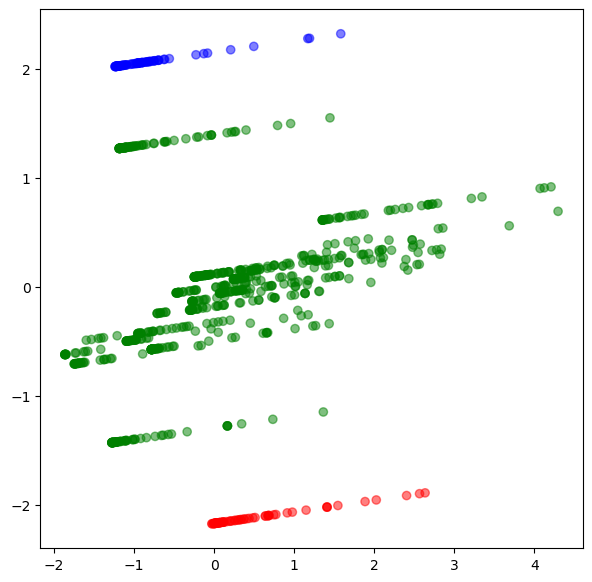

In [131]:
#-- Now setting  'k' = 3 clusters --#

kmeans = KMeans(n_clusters=3)

# Compute cluster centers and predict cluster indices

X_clustered = kmeans.fit_predict(pca_kmeans) 

#-- Define the color map --#

LABEL_COLOR_MAP = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'c', 5: 'm', 6: 'k'} 

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter digram --#

plt.figure(figsize = (7,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,3], c= label_color, alpha=0.5) 

plt.show()

It appears that when searching for 3 distinct clusters, a rectangular shape begins to appear, like a piece of paper or 'Bill', decomposed into main groupings and seperated into vector space.

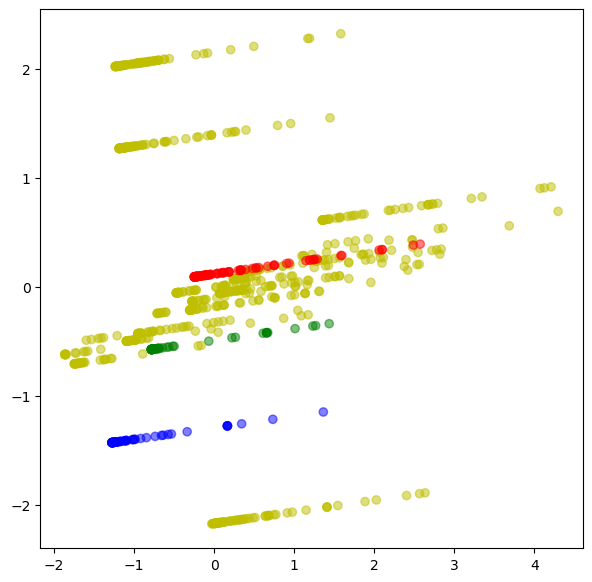

In [130]:
#-- Now setting  'k' = 4 clusters --#

kmeans = KMeans(n_clusters=4)

# Compute cluster centers and predict cluster indices

X_clustered = kmeans.fit_predict(pca_kmeans) 

#-- Define the color map --#

LABEL_COLOR_MAP = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'c', 5: 'm', 6: 'k'} 

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter digram --#

plt.figure(figsize = (7,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,3], c= label_color, alpha=0.5) 

plt.show()

Thats red stipe running through the yellow square could be an Title of interest, since it is distinct enough to be labeled on its own.  

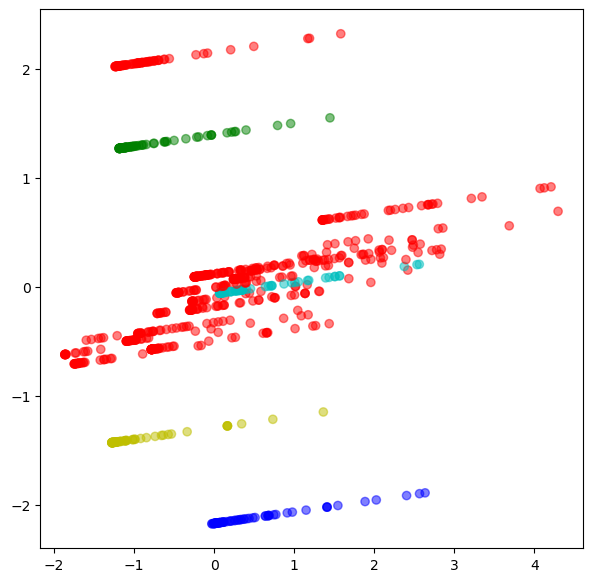

In [132]:
#-- Now setting  'k' = 5 clusters --#

kmeans = KMeans(n_clusters=5)

#-- Compute cluster centers and predict cluster indices --#

X_clustered = kmeans.fit_predict(pca_kmeans) 

#-- Define the color map --#

LABEL_COLOR_MAP = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'c', 5: 'm', 6: 'k'} 

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter digram --#

plt.figure(figsize = (7,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,3], c= label_color, alpha=0.5) 

plt.show()

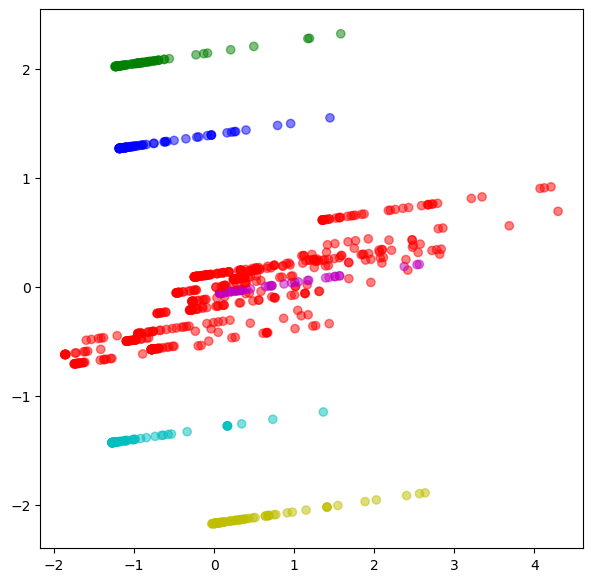

In [133]:
#-- Now setting  'k' = 6 clusters --#

kmeans = KMeans(n_clusters=6)

# Compute cluster centers and predict cluster indices

X_clustered = kmeans.fit_predict(pca_kmeans) 

#-- Define the color map --#

LABEL_COLOR_MAP = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'c', 5: 'm', 6: 'k'} 

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter digram --#

plt.figure(figsize = (7,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,3], c= label_color, alpha=0.5) 

plt.show()

# Now exploring the world of predictive Machine Learnig Models using the Division Dataset

In [145]:
DIV

,Division_A,Division_B,Division_C,Division_D,Division_F,Division_ E,Highest_amount
0,1,0,0,0,0,0,522220
1,1,0,0,0,0,0,711505
2,1,0,0,0,0,0,567874
3,1,0,0,0,0,0,347545
4,1,0,0,0,0,0,620647
...,...,...,...,...,...,...,...
822,0,0,0,0,1,0,2197
823,0,0,0,0,1,0,1500
824,0,0,0,0,1,0,1000
825,0,0,0,0,1,0,31700


In [152]:
#-- 'y' is the target variable --#
columns_to_drop = ['Highest_amount', 'Division_A', 'Division_B', 'Division_D', 'Division_F', 'Division_ E']
X = DIV.drop(columns_to_drop, axis=1)  # Features
y = DIV['Highest_amount']  # Target variable
#-- Splitting the two datasets in 4 sets. Reserving 20% for testing 80% for training --#

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#-- Instanitating the model --#
model = RandomForestRegressor()
#-- Fitting the model to the training data --#
model.fit(X_train, y_train)

RandomForestRegressor()

In [153]:
#-- Generating model predictions on the test set --#
predictions = model.predict(X_test)

In [155]:
#-- Calling evaluation metrics for model scoring --#
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 40389694930.83131
R-squared: -0.017029979772024584


In [156]:
#--Creating an early stopping monitor for computation / time saving --#

early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience =2)

# Build a simple feedforward neural network
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),   # Input layer
    keras.layers.Dense(64, activation='relu'),       # Hidden layer with 64 neurons and ReLU activation
    keras.layers.Dense(32, activation='relu'),       # Hidden layer with 32 neurons and ReLU activation
    keras.layers.Dense(1, activation='linear')       # Output layer with linear activation for regression
])

#-- Compile the model --#
model.compile(optimizer='adam', loss='mean_squared_error')  # Use mean squared error for regression tasks

#-- Train the model --#

#-- After 10 epochs, there is not a very big reduction in model loss --#
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


2024-03-14 16:02:49.589422: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


21/21 [==============================] - 1s 10ms/step - loss: 84861714432.0000 - val_loss: 61573644288.0000
Epoch 2/10
21/21 [==============================] - 0s 3ms/step - loss: 84861632512.0000 - val_loss: 61573550080.0000
Epoch 3/10
21/21 [==============================] - 0s 3ms/step - loss: 84861501440.0000 - val_loss: 61573386240.0000
Epoch 4/10
21/21 [==============================] - 0s 3ms/step - loss: 84861280256.0000 - val_loss: 61573115904.0000
Epoch 5/10
21/21 [==============================] - 0s 3ms/step - loss: 84860919808.0000 - val_loss: 61572665344.0000
Epoch 6/10
21/21 [==============================] - 0s 3ms/step - loss: 84860338176.0000 - val_loss: 61572030464.0000
Epoch 7/10
21/21 [==============================] - 0s 3ms/step - loss: 84859527168.0000 - val_loss: 61571080192.0000
Epoch 8/10
21/21 [==============================] - 0s 3ms/step - loss: 84858331136.0000 - val_loss: 61569810432.0000
Epoch 9/10
21/21 [==============================] - 0s 3ms/step - 

In [157]:
#-- Evaluate the model --#
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error: {mse}")


6/6 [==============================] - 0s 1ms/step - loss: 61565870080.0000
Mean Squared Error: 61565870080.0


In [158]:
#-- Create a list of the next 10 years (or adjust as needed) --#
next_years = np.arange(2026, 2036).reshape(-1, 1)

#-- Use your trained model to make predictions --#
predictions = model.predict(next_years)

#-- Print the predictions --#
for year, prediction in zip(next_years, predictions):
    print(f"Year: {year[0]}, Predicted Amount: {prediction[0]}")

1/1 [==============================] - 0s 130ms/step
Year: 2026, Predicted Amount: 52079.3515625
Year: 2027, Predicted Amount: 52105.046875
Year: 2028, Predicted Amount: 52130.74609375
Year: 2029, Predicted Amount: 52156.44140625
Year: 2030, Predicted Amount: 52182.1328125
Year: 2031, Predicted Amount: 52207.828125
Year: 2032, Predicted Amount: 52233.52734375
Year: 2033, Predicted Amount: 52259.21875
Year: 2034, Predicted Amount: 52284.9140625
Year: 2035, Predicted Amount: 52310.61328125


The neural net yeilded a Mean Squared Error score of 61565870080 after 10 epochs; A horrible score. When testing other model wieghts, it would be too computationally expensive to run say 100 epochs to increase the model accuracy. The running more epochs wont nessesary improve the model score either. Lastly the model predictions for the next 10 years is trending around the $5,220,000,000 mark.

In [161]:
# Instantiating the XGBoost model
model = xgb.XGBRegressor()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred.round())

print("R2 Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Accuracy:", accuracy)

R2 Score: -0.01715023992968101
Mean Squared Error (MSE): 40394470867.801384
Accuracy: 0.0


# Now comparing scores of models mathimatically 

Dividing the bigger score from the NueralNet to the Smaller score of XGBoost and then Random Forest.

In [3]:
# NueralNet  vs. XGBoost

61565870080 / 40394470867 

1.5241162653846232

In [4]:
# Nueralnet  vs. RandomForest

61565870080 / 40389694930

1.52429648668307

# XGBoost and RandomForest are 1.5X more powerful than NueralNet given the Bill data. 